# <h1><center>Research paper summary for<br>Semi-Supervised Clustering via Information-Theoretic Markov Chain Aggregation</h1></center>

This document is a Research paper summary, if this manages to grab your attention you can look for an Abstract, check the [video presentation](https://www.youtube.com/watch?v=LoI1AJpAIcU) or spend some minutes with the full publication [here](https://arxiv.org/abs/2112.09397) <br>
The original publication is done by:<br>
<b>SOPHIE STEGER</b>, Signal Processing and Speech Communication Laboratory, Graz University of Technology, Austria<br>
<b>BERNHARD C. GEIGER</b>, Know-Center GmbH, Austria<br>
<b>MAREK ŚMIEJA</b>, Faculty of Mathematics and Computer Science, Jagiellonian University, Poland <br>
After the summery i have done a small demo using the [originally uploaded code in GitHub](https://github.com/stegsoph/Constrained-Markov-Clustering). I have made some small changes so that i can easily use it in my summery (nothing has been changed in terms of the functionality of the code or the way the data is processed).<br>

<hr style="border:1px solid RosyBrown"> </hr>
 

   This Paper is tackling the sensitivity of unsupervised Markov aggregation clustering methods to hyperparameters.<br>
This models convert a dataset into a Markov Chain (MC) by using the data observations and the distance between them as MC states and MC transition probabilities respectively. The hyperparameters are part of the cost function the models try to minimize while clustering the data. This paper propose expanding the unsupervised setting to semi-supervised by providing side information in the form of some pre-labeled data points and/or pairwise constraints(information if 2 points are in the same class or are not in the same class).<br><br>
The results bellow show the NMI(Normalized Mutual Information) used as a scoring metric between unsupervised (0% labels) and the proposed in the paper semi-supervised (20% labels are provided as side information) settings for different datasets. <br>
$\beta$ is a hyperparameter of the cost function.<br>
<img src="../results.jpg" style="max-height: 400px" alt="Result" /> <br>
The drop in the beginning is addressed by $\beta$-Annealing Algorithm in CoMaC-ann. Focusing on the green and red line we can notice improvement in the score, yet it is not consistent between all datasets.<br><br>
Comparison between the proposed model and other models supporting semi-supervised clustering shows very good performance, It even comes first in the ranks for around half of the used datasets. The side information given to the models for the results bellow covers the elements of only 2 classes.<br>
<img src="../Comparison.jpg" style="max-height: 400px" alt="camparison" /> <br><br>
The research also confirms that by using pairwise constraints (derived from the side information regarding the labels), the Algorithm is capable to learn non-linear decision boundaries between clusters.
The paper shows that the algorithm is very sensitive to noisy (erroneous) side information, as well as some other limitations that could possibly be the topic of further research. Overall moving towards semi-supervised model and using the side information to set constraints improves the algorithm and lowers its sensitivity to hyperparameters. 



### Additional information used
[Polynomial Time](https://mathworld.wolfram.com/PolynomialTime.html)<br>
[P, NP, NP-Complete and NP-Hard Problems](https://www.baeldung.com/cs/p-np-np-complete-np-hard)<br>
[Fundamentals of Heuristic Algorithm](https://www.baeldung.com/cs/greedy-vs-heuristic-algorithm#:~:text=Heuristic%20algorithms%20are%20used%20to,step%20towards%20finding%20the%20solution.)<br>
[Hartigan vs Lloyd's Algorithm (k-meant clustering)](https://en.wikipedia.org/wiki/K-means_clustering#Hartigan-Wong_method%5B36%5D)
[Algorithms vs. Heuristics in Psychology: Overview & Examples](https://study.com/learn/lesson/algorithm-psychology-vs-heuristic-overview-examples.html#:~:text=Algorithms%20and%20heuristics%20are%20different,or%20rules%2Dof%2Dthumb.)<br>
[Heuristic vs Stochastic](https://thecontentauthority.com/blog/heuristic-vs-stochastic)<br>
[Hartigan's method for k-means clustering (exchange clustering algorithm)](https://www.jansellner.net/showcase/Hartigan%27s_method_for_k-means_clustering_%28exchange_clustering_algorithm%29)<br>
[aperiodic markov chain](https://www.collimator.ai/reference-guides/what-is-a-aperiodic-markov-chain)<br>
[markov chain periodic](https://www.collimator.ai/reference-guides/what-is-markov-chain-periodic)<br>
[Kullback-Leibler divergence rate](https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254)<br>
[What are Markov Chains and Steady-State Probabilities](https://jadhav-pritish.medium.com/all-about-markov-chains-and-steady-state-probabilities-cdf67253cc04)<br>
[Mutual Information](https://www.youtube.com/watch?v=eJIp_mgVLwE)<br>
[A Generalized Framework for Kullback-Leibler Markov Aggregation](https://arxiv.org/abs/1709.05907v1)<br>

<a id='top'></a>
# Running the code

Lets try to see how the performance of the model varies according to the side information provided.

We will use only the sequential algorithm with $\beta$=0.5 and k = [3,20,90,130,170]<br>
We will also fix the random states and choose 2 states that differ in their performance and will have a look at the distribution of this points. <br> 
We will use the Circle dataset.<br>
[Chart NMI according to the random state](#1)

In [1]:
%load_ext autoreload
%autoreload 2

#------------------------------------------------------------------------------#
# Import modules
from sklearn.metrics.cluster import normalized_mutual_info_score
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------#

#------------------------------------------------------------------------------#
# Import custom classes and functions
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
    
from models.data_gen import dataGen
from models.CoMaC import CoMaC

from utils.callback import save_results
from utils.helperFunc import partition_to_labels, generate_int_labels
from utils.plotting import show_clustering, show_transition_prob
from utils.dataloader import load_dataset

#------------------------------------------------------------------------------#

In [2]:
#------------------------------------------------------------------------------#
# Select from different datasets
#------------------------------------------------------------------------------#
dataset_str = 'Circles'
X, labels_true = load_dataset('a')

labels_true = generate_int_labels(labels_true)
M = len(np.unique(labels_true))

print(f'{dataset_str} dataset with {X.shape[1]} features, {X.shape[0]} samples and {M} classes.')


Circles dataset with 2 features, 180 samples and 3 classes.


In [3]:
def Summery_run(X, labels_true,ann = False,  knns=20, restarts=5, percentage=0.2, final_beta=0.0, beta = 0.5, pr = True, ranseed=42):
    '''
    X - features
    labels_true - targets
    ann = False - Sequential algorithm
    ann = True - Annealing algorithm
    print = True to see the print messages
    ranseed - makes things not random
    '''
    np.random.seed(ranseed)
#------------------------------------------------------------------------------#
# Initialize and generate constraints

# create an instance of the comac class
    comac = CoMaC(M=M, knns=knns, restarts=restarts)

### exhaustive constraints 
# retrieved from partition level side information
# |X_sampled|/|X| = percentage
# generate M (must link) and N (cannot link) from X_sampled

# comac.constraints(X, labels_true, percentage=percentage,
#                   wrong_percentage=0, ClassLabels=2)

### non-exhaustive constraints
# (|M|+|N|)/|X| = percentage

    comac.random_constraints(X, labels_true, percentage, flag_connected=True, pr=pr)
    constrains_t = len(comac.M_must)+len(comac.M_cannot)
    t_must = comac.M_must
    t_cannot = comac.M_cannot
    if pr : print('Total number of constraints: ', len(comac.M_must)+len(comac.M_cannot))
#------------------------------------------------------------------------------#
#------------------------------------------------------------------------------#
# Sequential algorithm
    if ann:
        #------------------------------------------------------------------------------#
        # Annealing algorithm

        if pr : print('~'*80 + f'\n Annealing Algorithm: final beta = {final_beta}')
        cost_ann, V_ann, beta_vec = comac.cluster_ann(X, final_beta=final_beta, step_size=-0.5, pr = pr)
        #------------------------------------------------------------------------------#
        labels_ann = []
        NMI_ann = np.zeros_like(beta_vec)

        for idx, beta in enumerate(beta_vec):
            labels_ann.append( partition_to_labels(V_ann[idx, :, :]) )
            NMI_ann[idx] = normalized_mutual_info_score(labels_true,
                                                labels_ann[-1])
            if pr : print(f'NMI = {NMI_ann[idx]} (beta={beta}) \n')
    
        #------------------------------------------------------------------------------#
        NMI = NMI_ann
        return NMI
    else:    
        if pr : print('~'*80 + f'\n Sequential Algorithm: beta = {beta}')
        cost_seq, V_seq = comac.cluster_seq(X, beta=beta, pr = pr)

    #------------------------------------------------------------------------------#
    #------------------------------------------------------------------------------#
        labels_seq = partition_to_labels(V_seq) 
        NMI_seq = normalized_mutual_info_score(labels_true, labels_seq)

        if pr : print(f'Sequential NMI = {NMI_seq} (beta={beta})')
    
    #------------------------------------------------------------------------------#
        NMI = NMI_seq
        return NMI,t_must, t_cannot

In [4]:
for n in range(1,4):
    NMI_list = [[] for _ in range(5)]
    k = [3,20,90,130,170]
    r = [42, 86, 12, 3, 20, 130]
    c = 0
    for i in k:
        for j in r:
            NMI_list[c].append(Summery_run(X, labels_true,knns = i, pr = False, ranseed=j, percentage=n/10))
        c+=1
    if n==1: NMI_10per = NMI_list
    elif n==2: NMI_20per = NMI_list
    elif n==3: NMI_30per = NMI_list
        

<a id= '1'></a>
[top](#top)

we can see that the performance is different based on the randomly selected points.<br>
Lets visually represent the points when the random state is 42 (blue line) and 3 (red line).
[visual representation of the dots](#2)

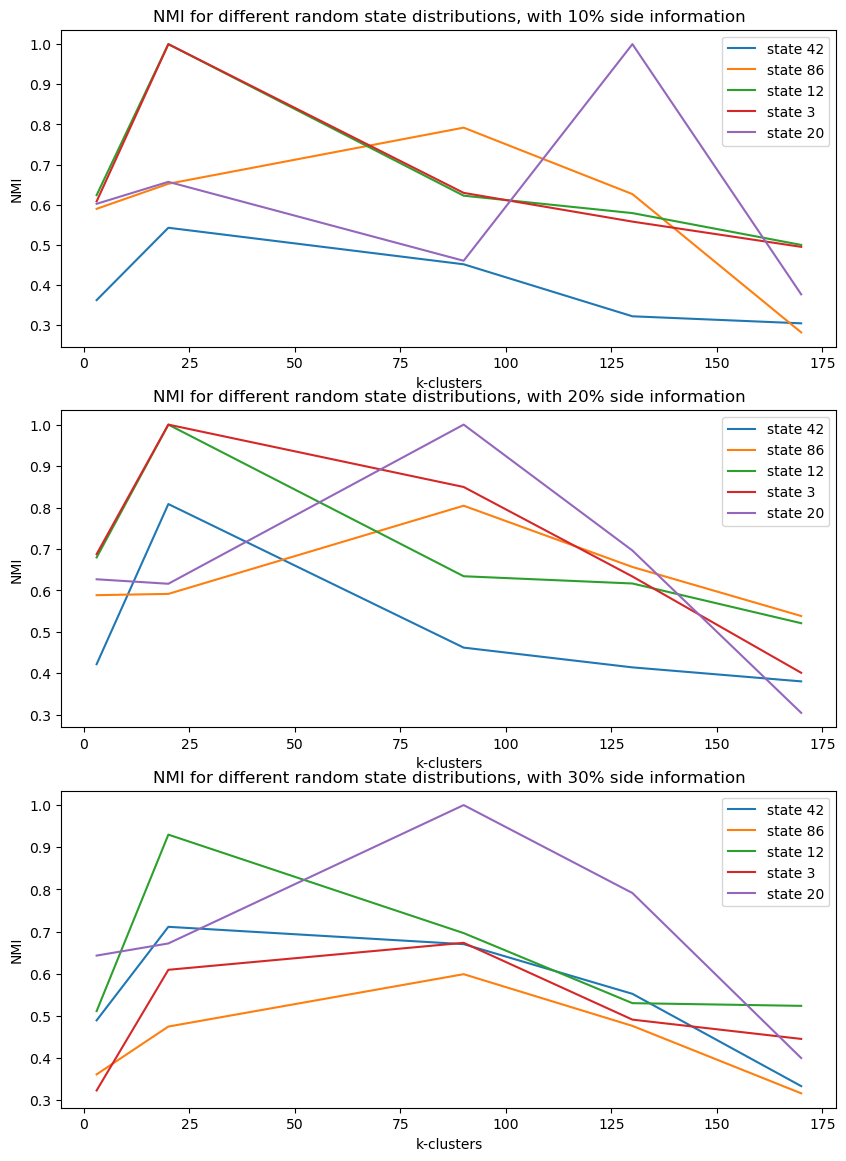

In [5]:
fig = plt.figure(figsize=(10, 14))
for p in range(3):
    plt.subplot(3,1,p+1)
    for i in range(5):
        plt.plot(k, [inner_list[i][0] for inner_list in [NMI_10per, NMI_20per, NMI_30per][p]], label = f'state {r[i]}')
        plt.xlabel('k-clusters')
        plt.ylabel('NMI')
        plt.title(f'NMI for different random state distributions, with {(p+1)*10}% side information')
        plt.legend()
    
    plt.legend()
plt.show()

<a id='2'></a>
[top](#top)

Visual presentation

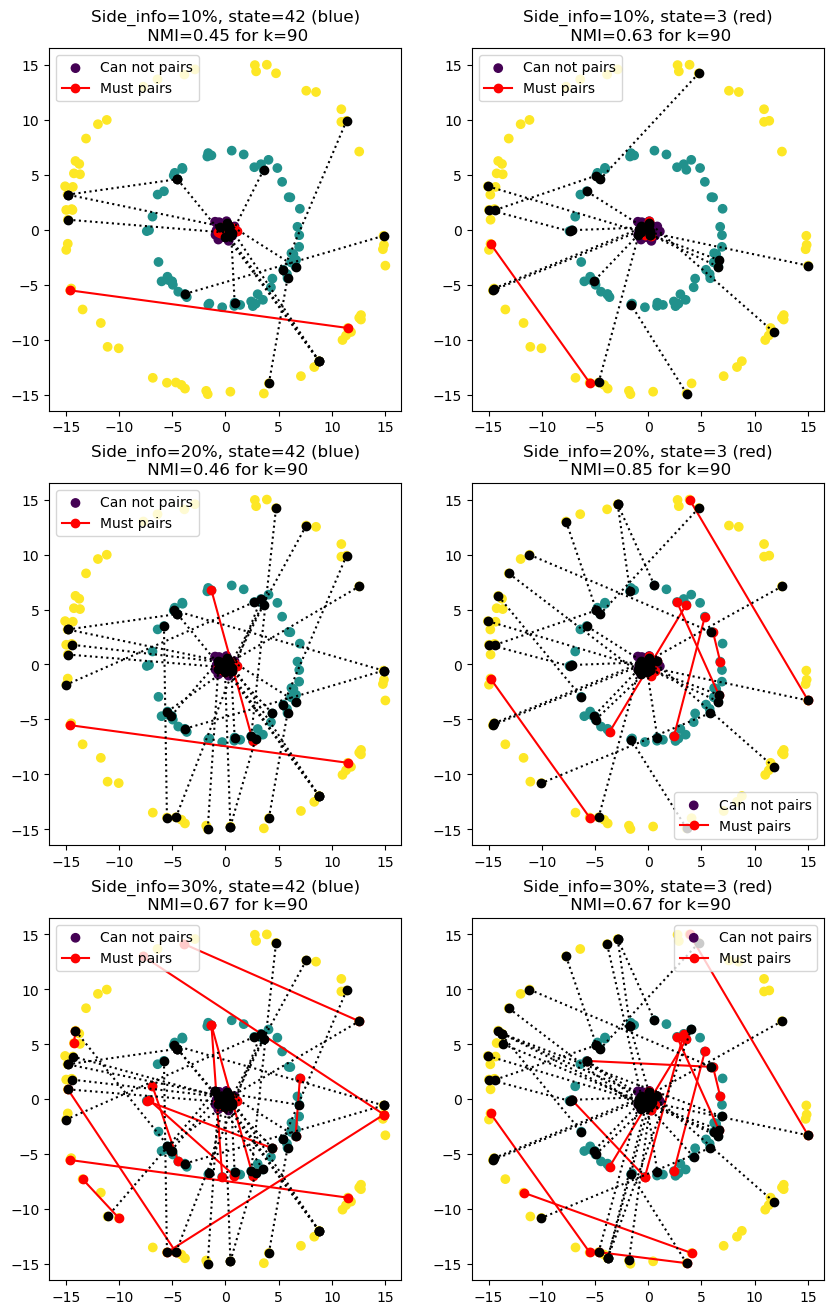

In [12]:
fig2 = plt.figure(figsize=(10, 16))
for p in range(3):
    plt.subplot(3,2,2*p+1)
    plt.scatter(X[:,0], X[:,1], c = labels_true)
    for i,j in [NMI_10per, NMI_20per, NMI_30per][p][2][0][1]:
        plt.plot([X[i][0], X[j][0]], [X[i][1],X[j][1]], marker='o', label='Must pairs', c = 'r')
    for i,j in [NMI_10per, NMI_20per, NMI_30per][p][2][0][2]:
        plt.plot([X[i][0], X[j][0]], [X[i][1],X[j][1]], linestyle = ':', marker='o', label='Can not pairs', c = 'black')
    plt.title(f'Side_info={(p+1)*10}%, state=42 (blue)\n NMI={[NMI_10per, NMI_20per, NMI_30per][p][2][0][0]:.2f} for k=90')
    plt.legend(['Can not pairs', 'Must pairs'])
    
    plt.subplot(3,2,2*p+2)
    plt.scatter(X[:,0], X[:,1], c = labels_true)
    for i,j in [NMI_10per, NMI_20per, NMI_30per][p][2][3][1]:
        plt.plot([X[i][0], X[j][0]], [X[i][1],X[j][1]], marker='o', label='Must pairs', c = 'r')
    for i,j in [NMI_10per, NMI_20per, NMI_30per][p][2][3][2]:
        plt.plot([X[i][0], X[j][0]], [X[i][1],X[j][1]], linestyle = ':', marker='o', label='Can not pairs', c = 'black')
    plt.title(f'Side_info={(p+1)*10}%, state=3 (red)\n NMI={[NMI_10per, NMI_20per, NMI_30per][p][2][3][0]:.2f} for k=90')
    plt.legend(['Can not pairs', 'Must pairs'])
plt.show()